# 1.IMPORTOWANIE PACZEK PYTHONOWYCH

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import scipy.stats as st  
import os

Styl wykresów  

In [2]:
sns.set_style('whitegrid')  

# 2.Wczytanie pliku danych  

os.getcwd()  
os.listdir()  
os.chdir("C:/Users/HP/Desktop/AWD") 

In [3]:
plik='bestsellers.csv'
dane = pd.read_csv(plik)

# 3.Dane

In [4]:
dane

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


# 4.Czyszczenie danych  

In [5]:
dane.isnull().sum() #brak brakujących wartości

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

# 4.1.Nieprawidłowości w danych  

4.1.1.W 2 miejscach źle napisano inicjały autora - jest przerwa pomiędzy literami w J.K.Rowling.

In [6]:
dane.loc[dane.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling' 

In [7]:
dane[dane.Author == 'J. K. Rowling'] #niepoprawne 
dane[dane.Author == 'J.K. Rowling'] #poprawne 

,Name,Author,User Rating,Reviews,Price,Year,Genre
102,Fantastic Beasts and Where to Find Them: The O...,J.K. Rowling,4.7,4370,15,2016,Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,4.0,23973,12,2016,Fiction
155,Harry Potter and the Goblet of Fire: The Illus...,J.K. Rowling,4.9,7758,18,2019,Fiction
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9,3146,30,2017,Fiction
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22,2016,Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J.K. Rowling,4.8,13471,52,2016,Fiction
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction


In [8]:
dane.loc[dane.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling' #poprawienie

4.1.2 Zmiana nazw kolumn na polskie 

In [9]:
dane.columns = ['Tytuł','Autor','Ocena', 'Liczba opinii', 'Cena', 'Rok', 'Gatunek']

# 5.Opisy zmiennych

# 5.1.Tytuł 

In [10]:
tytul = 'Tytuł'
dane[tytul].describe() #informacje o tytułach 

count                                                   550
unique                                                  351
top       Publication Manual of the American Psychologic...
freq                                                     10
Name: Tytuł, dtype: object

In [50]:
ranking_tyt = dane.groupby(['Tytuł', 'Autor', 'Gatunek'], as_index=False)[['Ocena', 'Liczba opinii']].mean()  
ranking_tyt = ranking_tyt[ranking_tyt['Liczba opinii']>3000]  
ranking_tyt = ranking_tyt.sort_values('Ocena', ascending=False).head(20)  
ranking_tyt

,Tytuł,Autor,Gatunek,Ocena,Liczba opinii
177,Obama: An Intimate Portrait,Pete Souza,Non Fiction,4.9,3192.0
71,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,Fiction,4.9,5470.0
118,Harry Potter and the Goblet of Fire: The Illus...,J.K. Rowling,Fiction,4.9,7758.0
119,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,Fiction,4.9,3146.0
120,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,Fiction,4.9,10052.0
112,Hamilton: The Revolution,Lin-Manuel Miranda,Non Fiction,4.9,5867.0
108,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,Fiction,4.9,7038.0
66,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,Fiction,4.9,5062.0
36,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,Fiction,4.9,14344.0
312,The Wonderful Things You Will Be,Emily Winfield Martin,Fiction,4.9,8842.0


Wykres dla najczęściej występujących tytułów

In [51]:
tytuly = dane['Tytuł']  
pos_nazwy = tytuly.value_counts()  
najcz_nazwy = pos_nazwy.iloc[:18]  
najcz_nazwy

Publication Manual of the American Psychological Association, 6th Edition            10
StrengthsFinder 2.0                                                                   9
Oh, the Places You'll Go!                                                             8
The Very Hungry Caterpillar                                                           7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change          7
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)     6
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)             6
The Official SAT Study Guide                                                          5
How to Win Friends & Influence People                                                 5
The Five Dysfunctions of a Team: A Leadership Fable                                   5
Laugh-Out-Loud Jokes for Kids                                                         5
Giraffes Can't Dance            

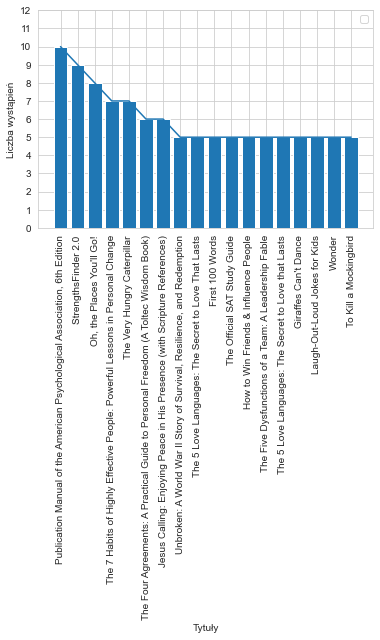

In [14]:
y = najcz_nazwy  
dane2 = y.reset_index()  
dane2.plot(rot=90)  
plt.bar(dane2.index, y)  
plt.xticks(range(len(y)), pos_nazwy.index)  
plt.yticks(range(0,13))  
plt.ylabel('Liczba wystąpień')  
plt.xlabel('Tytuły')  
plt.legend('') 

# 5.2.Autor 

In [15]:
autor = 'Autor'
dane[autor].describe() #informacje o autorach

count             550
unique            247
top       Jeff Kinney
freq               12
Name: Autor, dtype: object

Wykres dla najczęściej występujących autorów

In [16]:
#znalezienie najczęściej występujących autorów
autorzy = dane['Autor']  
pos_autorzy = autorzy.value_counts()  
najcz_autorzy = pos_autorzy.iloc[:13]  
najcz_autorzy

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
J.K. Rowling                           8
Rob Elliott                            8
Stephen R. Covey                       7
Eric Carle                             7
Bill O'Reilly                          7
Stephenie Meyer                        7
Name: Autor, dtype: int64

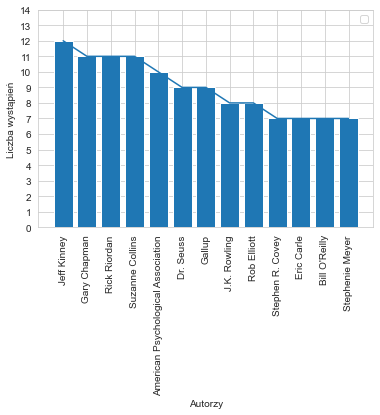

In [17]:
x = najcz_autorzy  
dane1 = x.reset_index()  
dane1.plot(rot=90)  
plt.bar(dane1.index, x)  
plt.xticks(range(len(x)), pos_autorzy.index)  
plt.yticks(range(0,15))  
plt.ylabel('Liczba wystąpień')  
plt.xlabel('Autorzy')  
plt.legend('')
plt.show() 

# 5.3.Ocena

In [18]:
ocena = 'Ocena'  
print(dane[ocena].describe())  
print(dane[ocena].median())  
print(dane[ocena].mode())

count    550.000000
mean       4.618364
std        0.226980
min        3.300000
25%        4.500000
50%        4.700000
75%        4.800000
max        4.900000
Name: Ocena, dtype: float64
4.7
0    4.8
dtype: float64


Histogram zmiennej ocena 

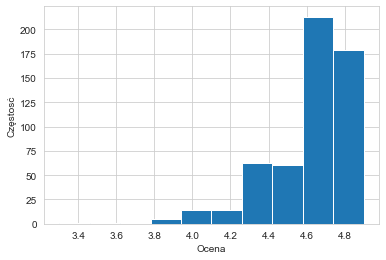

In [19]:
plt.hist(dane[ocena])  
plt.xlabel('Ocena')  
plt.ylabel('Częstosć')  
plt.show()  

# 5.4.Liczba opinii

In [20]:
opinie = 'Liczba opinii'  
print(dane[opinie].describe())  
print(dane[opinie].median())  
print(dane[opinie].mode())  

count      550.000000
mean     11953.281818
std      11731.132017
min         37.000000
25%       4058.000000
50%       8580.000000
75%      17253.250000
max      87841.000000
Name: Liczba opinii, dtype: float64
8580.0
0    8580
dtype: int64


Histogram zmiennej liczba opinii 

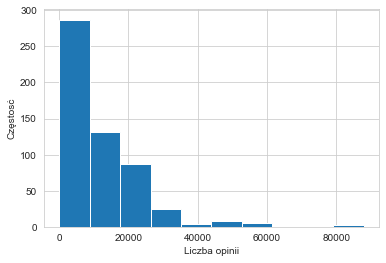

In [21]:
plt.hist(dane[opinie])  
plt.xlabel('Liczba opinii')  
plt.ylabel('Częstosć')  
plt.show()  

# 5.5.Cena 

In [22]:
dane['Cena'].mean()

13.1

In [23]:
dane['Cena'].median()  

11.0

In [24]:
dane['Cena'].mode()  

0    8
dtype: int64

In [25]:
dane['Cena'].std()  

10.84226197842236

In [26]:
dane['Cena'].max()  

105

In [27]:
dane['Cena'].min()  

0

In [28]:
dane['Cena'].quantile(0.25)  

7.0

In [29]:
dane['Cena'].quantile(0.75)

16.0

Wykres pudełkowy dla zmiennej 'Cena'

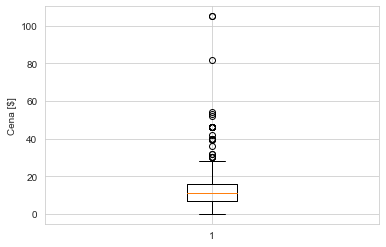

In [30]:
plt.boxplot(dane['Cena']) 
plt.ylabel('Cena [$]') 
plt.savefig('wykres pudełkowy dla ceny') 
plt.show()

# 5.6.Rok

In [31]:
dane = dane.sort_values(by = 'Rok', ascending = True)  
print(dane.Rok) 

177    2009
131    2009
417    2009
241    2009
72     2009
       ... 
150    2019
466    2019
462    2019
130    2019
549    2019
Name: Rok, Length: 550, dtype: int64


# 5.7.Gatunek  

In [32]:
gatunek = 'Gatunek'  
dane[gatunek].describe() 

count             550
unique              2
top       Non Fiction
freq              310
Name: Gatunek, dtype: object

Wykres kołowy dla zmiennej gatunek

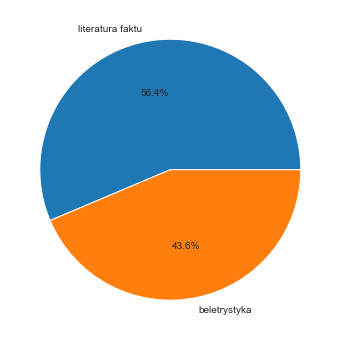

In [33]:
labels= ['literatura faktu', 'beletrystyka'] 
plt.figure(figsize =(6, 6))  
plt.pie(dane[gatunek].value_counts(), labels=labels,  autopct='%1.1f%%') 
plt.show() 

# 6.Badanie związków między zmiennymi

# 6.1.Czy występuje różnica między średnią ceną książek beletrystki i książek literatury faktu w latach 2009-2019?

In [34]:
beletrystyka = dane[dane.Gatunek == 'Fiction']  
literatura_faktu = dane[dane.Gatunek == 'Non Fiction']  

Korelacja

In [35]:
st.ttest_ind(beletrystyka['Cena'], literatura_faktu['Cena'])  
srednia_1 = beletrystyka['Cena'].mean()  
srednia_2 = literatura_faktu['Cena'].mean()  

Wykres

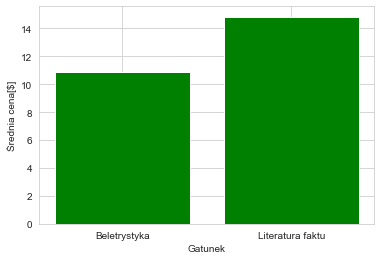

In [36]:
x = ['srednia_1', 'srednia_2']  
y = [beletrystyka['Cena'].mean(), literatura_faktu['Cena'].mean()]  
podpisy =['Beletrystyka', 'Literatura faktu']  
plt.bar(x,y, color = 'g')  
plt.xticks(x, podpisy)  
plt.xlabel('Gatunek')  
plt.ylabel('Średnia cena[$]')  
plt.show()  

# 6.2.Czy jest różnica w ocenach książek literatury faktu i beletrystyki?

Korelacja

In [37]:
st.ttest_ind(beletrystyka['Ocena'],literatura_faktu['Ocena'])

Ttest_indResult(statistic=2.7406936696488353, pvalue=0.0063309975552837015)

Wykres

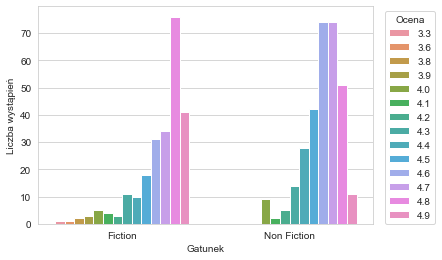

In [38]:
plt.figure()  
sns.countplot(x='Gatunek', data=dane, hue='Ocena')  
plt.legend (title="Ocena", bbox_to_anchor=(1.2, 1.0))   
plt.xlabel('Gatunek')  
plt.ylabel('Liczba wystąpień')  
plt.show()

Tabelka

In [39]:
print(dane.groupby('Gatunek')[['Ocena']].mean())  

                Ocena
Gatunek              
Fiction      4.648333
Non Fiction  4.595161


# 6.3.Czy istnieje zależność między ceną książki a liczbą opinii?

Korelacja

In [40]:
st.spearmanr(dane['Cena'], dane['Liczba opinii'])

SpearmanrResult(correlation=-0.15026314273004004, pvalue=0.0004061394606754506)

Wykres

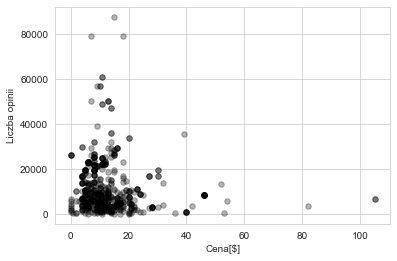

In [41]:
plt.scatter(dane['Cena'], dane['Liczba opinii'], c='black', alpha=0.3, s=30)  
plt.xlabel('Cena[$]')  
plt.ylabel('Liczba opinii')   
plt.show() 

# 6.4.Czy istnieje zależność między ceną książki, a oceną czytelników?

Korelacja

In [42]:
st.pearsonr(dane['Cena'],dane['Ocena'])

(-0.13308628728087993, 0.0017601566810136159)

Wykres

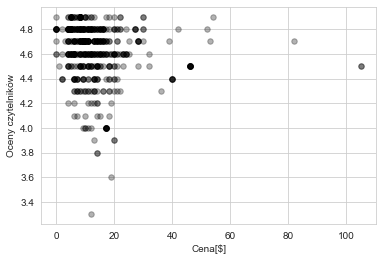

In [43]:
plt.scatter(dane['Cena'],dane['Ocena'], c='black', alpha=0.3, s=30)  
plt.xlabel('Cena[$]')  
plt.ylabel('Oceny czytelników')  
plt.show() 

# 6.5.Czy średnia liczba opinii zmieniała się na przestrzeni lat?

Korelacja

In [44]:
st.spearmanr(dane['Rok'], dane['Liczba opinii'])

SpearmanrResult(correlation=0.3937518874139555, pvalue=7.690503491673151e-22)

Dane to tableli

In [45]:
dane.groupby('Rok')['Liczba opinii'].mean()

Rok
2009     4710.12
2010     5479.62
2011     8100.82
2012    13090.92
2013    13098.14
2014    15859.94
2015    14233.38
2016    14196.00
2017    12888.40
2018    13930.42
2019    15898.34
Name: Liczba opinii, dtype: float64

# 6.6.Czy średnia ocena czytelników zmieniała się na przestrzeni lat?

Korelacja

In [46]:
st.spearmanr(dane.Rok, dane.Ocena) 

SpearmanrResult(correlation=0.28691261770746107, pvalue=6.9784817170073824e-12)

Dane to tabeli

In [47]:
dane.groupby('Rok')['Ocena'].mean() 

Rok
2009    4.584
2010    4.558
2011    4.558
2012    4.532
2013    4.554
2014    4.622
2015    4.648
2016    4.678
2017    4.660
2018    4.668
2019    4.740
Name: Ocena, dtype: float64

# 6.7.Czy istnieje związek między całkowitą liczbą recenzji autora a średnią oceną tego autora przez użytkowników?

Korelacja

In [48]:
st.spearmanr(dane['Liczba opinii'], dane['Ocena']) 

SpearmanrResult(correlation=0.20045803777248955, pvalue=2.1515378107174905e-06)

Wykres

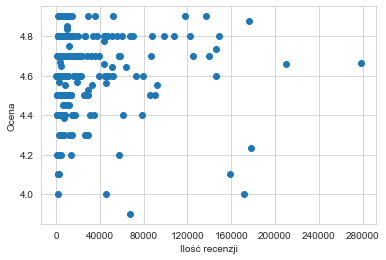

In [49]:
x=dane.groupby('Autor')['Liczba opinii'].sum() 
x.max() #największa ilosc recenzji 
y=dane.groupby('Autor')['Ocena'].mean() 
plt.scatter(x,y) 
plt.xticks(range(0,280001,40000)) 
plt.xlabel('Ilość recenzji') 
plt.ylabel('Ocena') 
plt.show() 